**------Project Phase 2------**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [156]:
# Load the datasets
oil_data = pd.read_csv('/content/Updated_BrentOilPrices.csv')
tesla_data = pd.read_csv('/content/Stock Market Dataset.csv')
tesla_data = tesla_data[['Date','Tesla_Price']]

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'], format='%d-%m-%Y')
oil_data['Date'] = pd.to_datetime(oil_data['Date'], format='%Y-%m-%d')
oil_data = oil_data.iloc[8024:]
tesla_data = tesla_data.iloc[277:]

tesla_data.head(8361)

,Date,Tesla_Price
277,2022-12-23,123.15
278,2022-12-22,125.35
279,2022-12-21,137.57
280,2022-12-20,137.80
281,2022-12-19,149.87
...,...,...
1238,2019-02-08,20.39
1239,2019-02-07,20.50
1240,2019-02-06,21.15
1241,2019-02-05,21.42


In [ ]:
oil_data.head(8361)

,Date,Price
8024,2019-01-02,54.06
8025,2019-01-03,53.23
8026,2019-01-04,55.64
8027,2019-01-07,57.10
8028,2019-01-08,56.91
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [ ]:
merged = pd.merge(tesla_data, oil_data, on='Date', how='inner')
merged["Price"] = pd.to_numeric(merged["Price"], errors='coerce')
merged["Tesla_Price"] = pd.to_numeric(merged["Tesla_Price"], errors='coerce')
merged.head(10000)

,Date,Tesla_Price,Price
0,2022-11-14,190.95,93.59
1,2022-11-11,195.97,96.37
2,2022-11-10,190.72,94.25
3,2022-11-09,177.59,93.05
4,2022-11-08,191.30,96.85
...,...,...,...
920,2019-02-08,20.39,61.37
921,2019-02-07,20.50,61.01
922,2019-02-06,21.15,62.22
923,2019-02-05,21.42,61.67


In [ ]:
merged.fillna(method='bfill', inplace=True)
merged.to_csv("/content/merged.csv")
merged.head(1500)

,Date,Tesla_Price,Price
0,2022-11-14,190.95,93.59
1,2022-11-11,195.97,96.37
2,2022-11-10,190.72,94.25
3,2022-11-09,177.59,93.05
4,2022-11-08,191.30,96.85
...,...,...,...
920,2019-02-08,20.39,61.37
921,2019-02-07,20.50,61.01
922,2019-02-06,21.15,62.22
923,2019-02-05,21.42,61.67


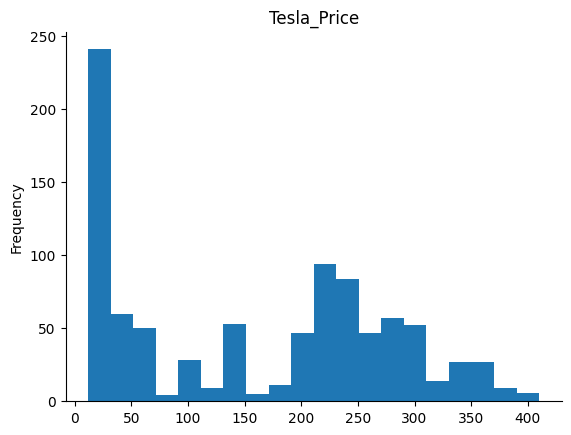

In [ ]:
merged['Tesla_Price'].plot(kind='hist', bins=20, title='Tesla_Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

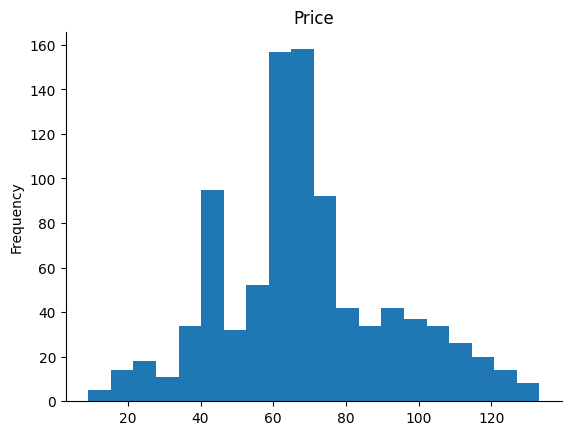

In [ ]:
merged['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

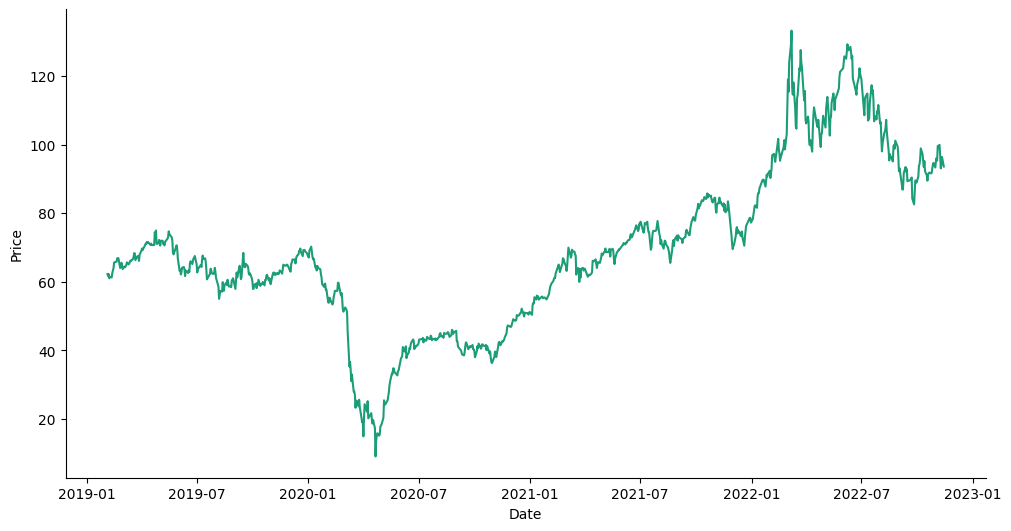

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

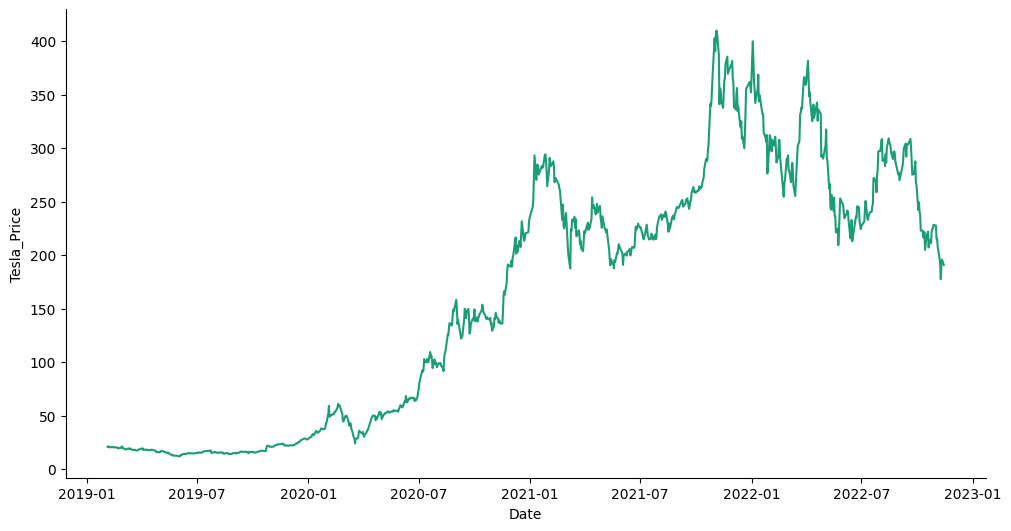

In [ ]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Tesla_Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Tesla_Price')

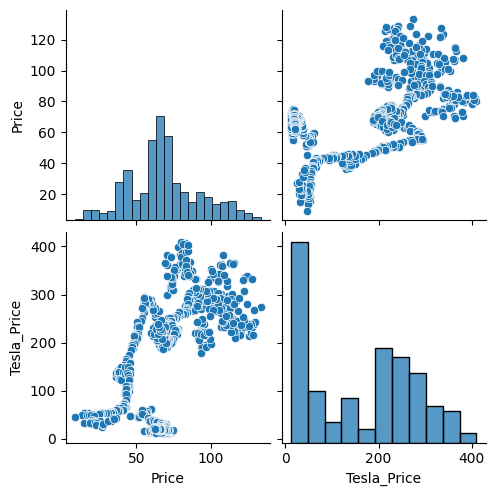

In [ ]:
cols = ["Price", "Tesla_Price"]
sns.pairplot(data=merged, vars=cols)

In [ ]:
stats.pearsonr(merged["Price"], merged["Tesla_Price"])

PearsonRResult(statistic=0.5788910855374884, pvalue=7.132760243490819e-84)

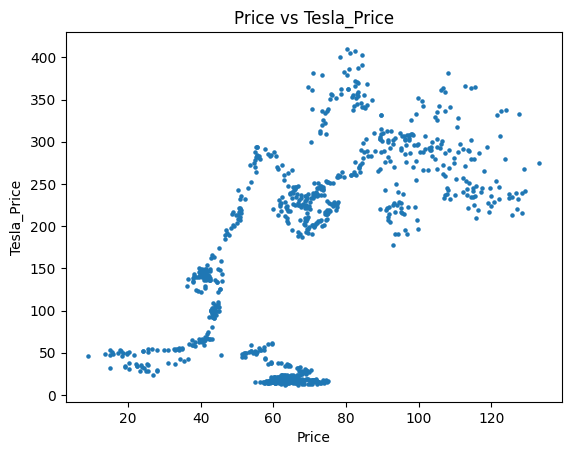

In [ ]:
merged.plot.scatter(x="Price", y="Tesla_Price", s=5)
plt.title("Price vs Tesla_Price")
plt.xlabel("Price")
plt.ylabel("Tesla_Price")
plt.show()

In [ ]:
# extracting the input and output vectors
x = merged['Price'].values.reshape(-1,1)  # converting to column vector
y = merged['Tesla_Price'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#create linear regression model
model = LinearRegression()
model.fit(x, y)

#R^2 score
r2_value = r2_score(y, model.predict(x))

mse = mean_squared_error(y, model.predict(x))

error_rate = mse / y.var()

accuracy_rate = 1 - error_rate

r2_value, mse, error_rate, accuracy_rate

(0.3351148889147716, 9188.320032372689, 0.6648851110852285, 0.3351148889147715)

In [ ]:
# intercept
b = model.intercept_
# slope
m = model.coef_

print(m, b, sep="\n")

[2.8785522]
-38.37854599961304


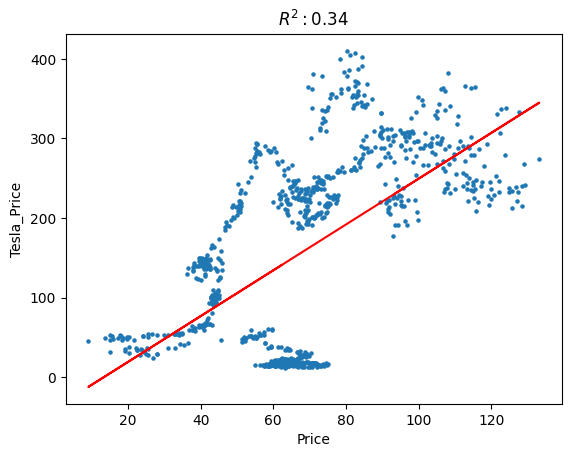

In [ ]:
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)
rline = m[0]*x.flatten() + b

merged.plot.scatter(x="Price", y="Tesla_Price", s=5)
plt.plot(x.flatten(), rline, c="red")
plt.title(r"$R^2: {:.2f}$".format(r2(y, rline)))
plt.xlabel("Price")
plt.ylabel("Tesla_Price")
plt.show()

***------Project Phase 3------***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from ipywidgets import interact
from sklearn.neighbors import KNeighborsClassifier # is not working ?

In [ ]:
A = merged[['Price']]
b = merged['Tesla_Price']

In [ ]:
#A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)
A_train_val, A_test, b_train_val, b_test = train_test_split(A, b, test_size=0.2, random_state=42)
A_train, A_val, b_train, b_val = train_test_split(A_train_val, b_train_val, test_size=0.2, random_state=42)

In [ ]:
knn1 = KNeighborsRegressor(n_neighbors=1)

knn1.fit(A_train, b_train)

b_pred_1 = knn1.predict(A_test)

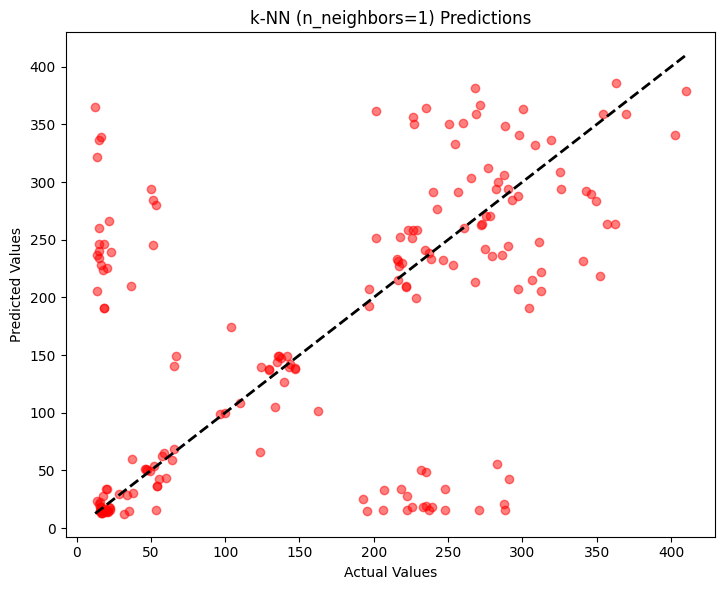

RMSE1: 118.34
MSE1: 14003.92


In [ ]:
plt.figure(figsize=(14, 6))

#Scatter plot for k-NN with n_neighbors=1
plt.subplot(1, 2, 2)
plt.scatter(b_test, b_pred_1, color='red', alpha=0.5)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-NN (n_neighbors=1) Predictions')
rmse1 = np.sqrt(mean_squared_error(b_test, b_pred_1))
mse1 = mean_squared_error(b_test, b_pred_1)

#Display the plots
plt.tight_layout()
plt.show()

#Display the values RMSE with k =1 and MSE
print(f"RMSE1: {rmse1:.2f}")
print(f"MSE1: {mse1:.2f}")

In [ ]:
knn14 = KNeighborsRegressor(n_neighbors = 14)

knn14.fit(A_train, b_train)

b_pred_14 = knn14.predict(A_test)

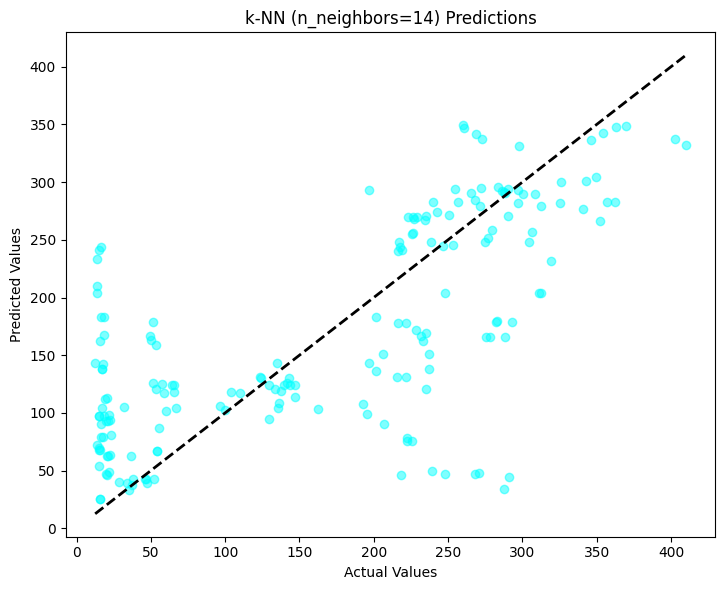

RMSE14: 84.08
MSE14: 7068.81


In [ ]:
plt.figure(figsize=(14, 6))

#Scatter plot for k-NN with n_neighbors=14
plt.subplot(1, 2, 1)
plt.scatter(b_test, b_pred_14, color='cyan', alpha=0.5)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-NN (n_neighbors=14) Predictions')
rmse14 = np.sqrt(mean_squared_error(b_test, b_pred_14))
mse14 = mean_squared_error(b_test, b_pred_14)

#Display the plots
plt.tight_layout()
plt.show()

#Display the values RMSE with k =14 and MSE
print(f"RMSE14: {rmse14:.2f}")
print(f"MSE14: {mse14:.2f}")

In [ ]:
# Interactive visualization function
def visualize_knn(k):
    # Generate the k-NN regressor model
    model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model
    model.fit(A_train, b_train)

    # Predict on the validation set
    b_pred_val = model.predict(A_val)

    # Calculate MSE and RMSE on validation set
    mse_val = mean_squared_error(b_val, b_pred_val)
    rmse_val = np.sqrt(mse_val)

    # Predict on the test set
    b_pred_test = model.predict(A_test)

    # Calculate MSE and RMSE on test set
    mse_test = mean_squared_error(b_test, b_pred_test)
    rmse_test = np.sqrt(mse_test)

    # Plot actual vs. predicted values for test set
    plt.figure(figsize=(8, 6))
    plt.scatter(b_test, b_pred_test, color='blue', alpha=0.5)
    plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'k-NN (n_neighbors={k}) Predictions\nTest RMSE: {rmse_test:.2f}, Validation RMSE: {rmse_val:.2f}')
    plt.show()

# Use ipywidgets to interactively change the value of k
interact(visualize_knn, k=(1, 20))

interactive(children=(IntSlider(value=10, description='k', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.visualize_knn(k)>

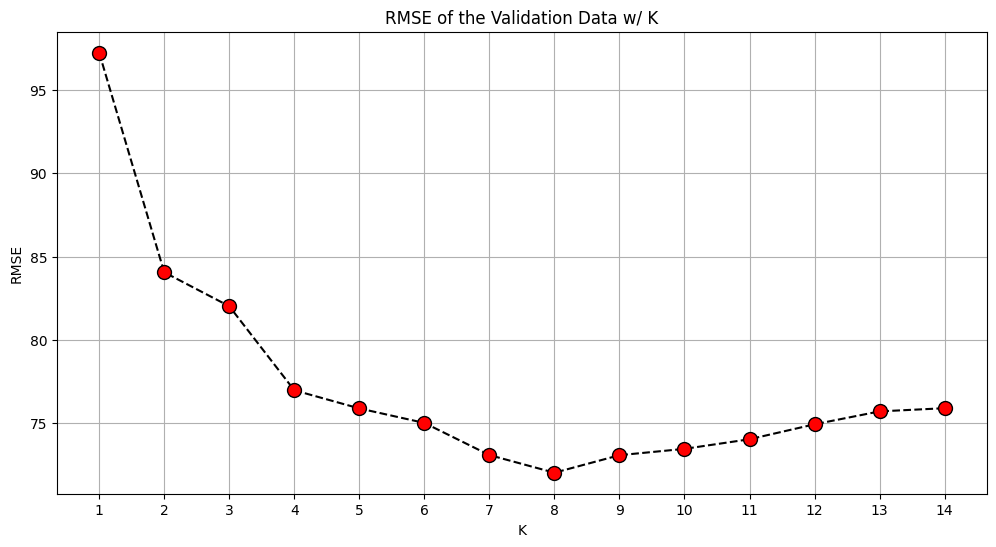

In [ ]:
# RMSE calculation for different k values
K_range = np.arange(1, 15)
rmse_list = []

for k in K_range:
    # Create a new model with current K
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")

    # Fit training data
    knn.fit(A_train, b_train)

    # Predict the validation data
    b_pred_val = knn.predict(A_val)

    # Obtain the RMSE value
    rmse = np.sqrt(mean_squared_error(b_val, b_pred_val))
    rmse_list.append(rmse)

plt.figure(figsize=(12, 6))
plt.plot(K_range, rmse_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RMSE of the Validation Data w/ K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.xticks(K_range)
plt.grid()
plt.show()


In [182]:
knn_best = KNeighborsRegressor(n_neighbors=8, metric="euclidean")

knn_best.fit(A_train, b_train)

b_pred_best = knn_best.predict(A_test)


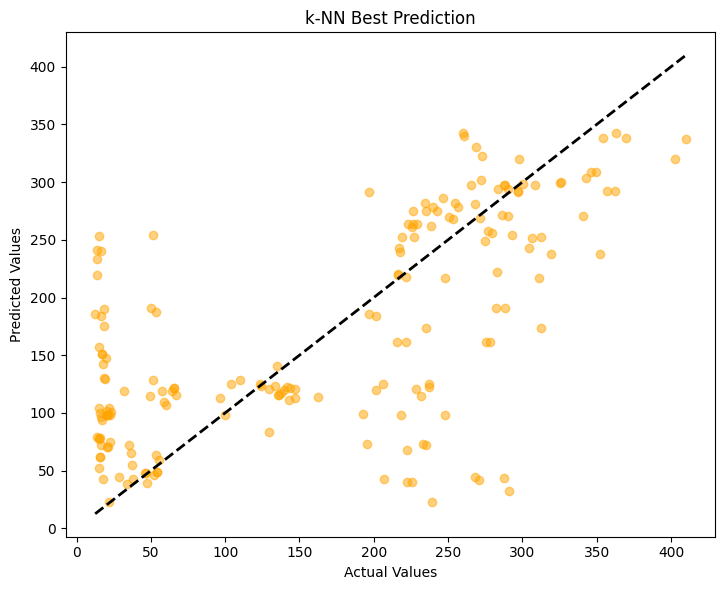

RMSE: 89.71
MSE: 8048.20


In [183]:
plt.figure(figsize=(14, 6))

#Scatter plot for k-NN with n_neighbors=8
plt.subplot(1, 2, 1)
plt.scatter(b_test, b_pred_best, color='orange', alpha=0.5)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('k-NN Best Prediction')

#Display the plots
plt.tight_layout()
plt.show()

#Obtain the RMSE value
rmse = np.sqrt(mean_squared_error(b_test, b_pred_best))
mse = mean_squared_error(b_test, b_pred_best)
print(f"RMSE: {rmse:.2f}")
print(f"MSE: {mse:.2f}")

------------------------------------------------------------Second ML------------------------------------------------------------

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
M= merged[['Price']]
n = merged['Tesla_Price']

M_train_val, M_test, n_train_val, n_test = train_test_split(M, n, test_size=0.2, random_state=42)
M_train, M_val, n_train, n_val = train_test_split(M_train_val, n_train_val, test_size=0.2, random_state=42)

In [185]:
rf_model_50 = RandomForestRegressor(n_estimators=50, random_state=42,max_depth = 10)

rf_model_50.fit(A_train, b_train)

b_pred_50 = rf_model_50.predict(A_test)

Mean Squared Error: 8880.881816514739
Root Mean Squared Error: 94.23843067727061


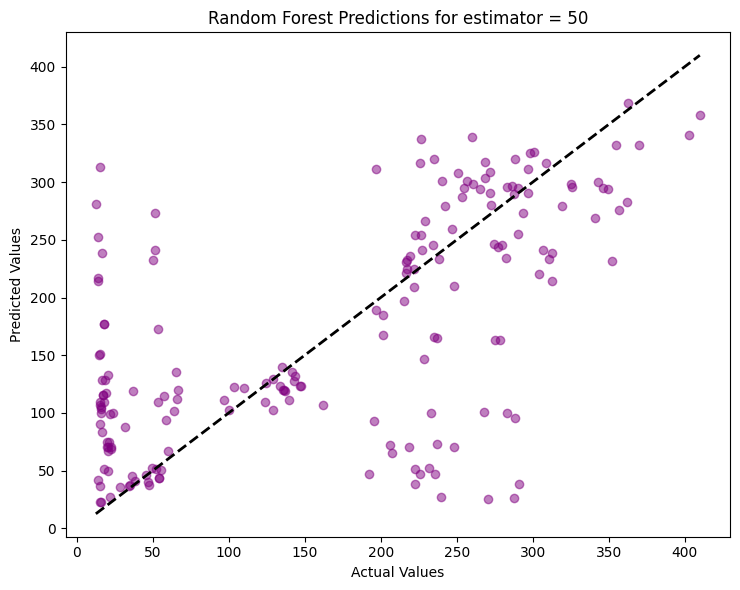

In [186]:
plt.figure(figsize=(7.5, 6))
# Scatter plot for Random Forest Predictions
plt.scatter(b_test, b_pred_50, color='purple', alpha=0.5)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions for estimator = 50')
mse = mean_squared_error(b_test, b_pred_50)
rmse = np.sqrt(mse)

plt.tight_layout()
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

In [187]:
rf_model_450 = RandomForestRegressor(n_estimators=450, random_state=42,max_depth = 10)

rf_model_450.fit(A_train, b_train)

b_pred_450 = rf_model_450.predict(A_test)

Mean Squared Error: 8848.814197052769
Root Mean Squared Error: 94.06813592844694


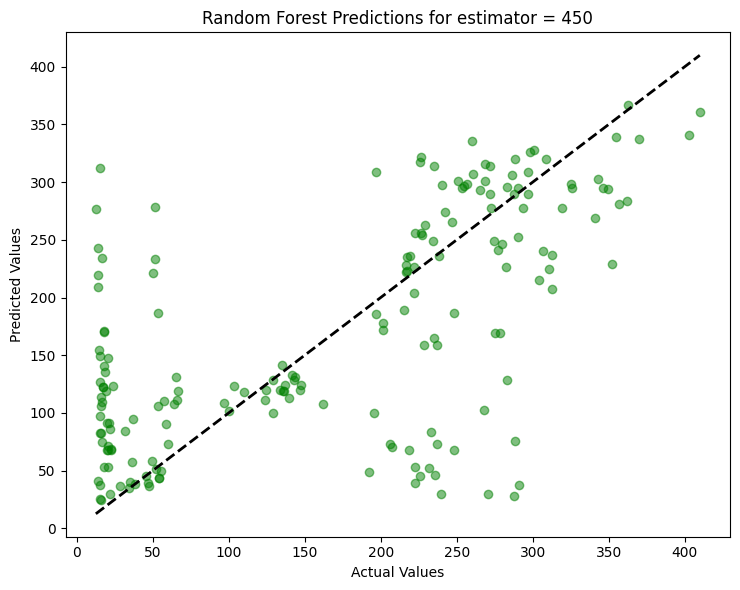

In [188]:
plt.figure(figsize=(7.5, 6))
# Scatter plot for Random Forest Predictions
plt.scatter(b_test, b_pred_450, color='green', alpha=0.5)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions for estimator = 450')

plt.tight_layout()
plt.show()

mse = mean_squared_error(b_test, b_pred_450)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

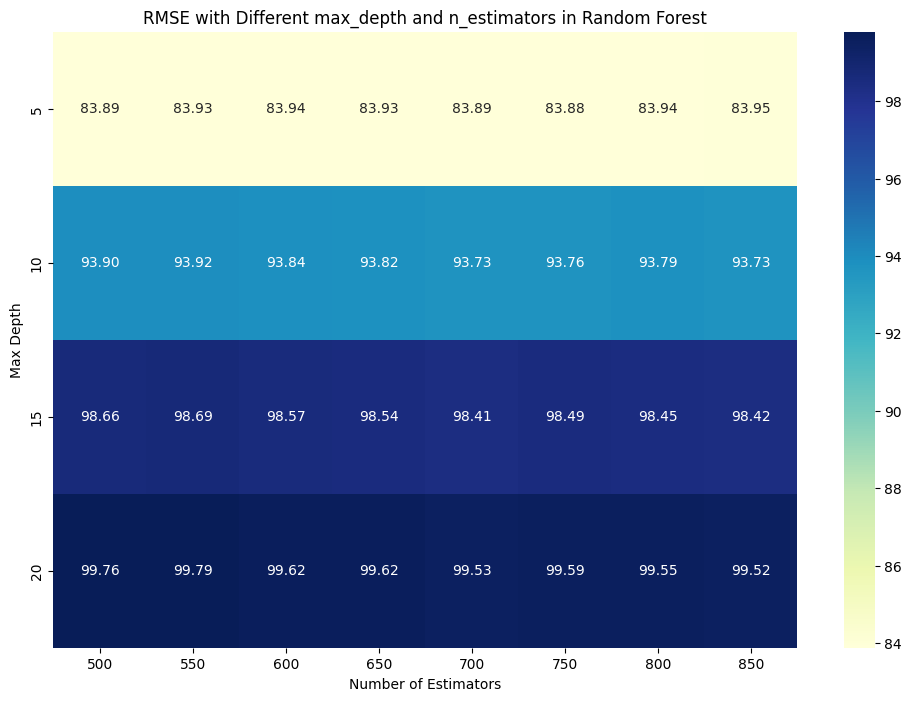

In [190]:
L = merged[['Price']]
i = merged['Tesla_Price']

# Split the data into training and testing sets
L_train, L_test, i_train, i_test = train_test_split(L, i, test_size=0.2, random_state=42)

# Define the parameter grid for max_depth and n_estimators
max_depth_range = [5, 10, 15, 20]
n_estimators_range = np.arange(500, 900, 50)

# Initialize the results dictionary
results = {'max_depth': [], 'n_estimators': [], 'rmse': []}

# Perform grid search
for max_depth in max_depth_range:
    for n_estimators in n_estimators_range:
        # Initialize the Random Forest Regressor
        rf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)

        # Train the model
        rf.fit(L_train, i_train)

        # Predict on the test set
        i_pred = rf.predict(L_test)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(i_test, i_pred))

        # Store the results
        results['max_depth'].append(max_depth)
        results['n_estimators'].append(n_estimators)
        results['rmse'].append(rmse)

results_df = pd.DataFrame(results)

# Pivot the results DataFrame for heatmap plotting
results_pivot = results_df.pivot(index='max_depth', columns='n_estimators', values='rmse')


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(results_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('RMSE with Different max_depth and n_estimators in Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()

In [192]:
rf_model_best = RandomForestRegressor(n_estimators=750, random_state=42,max_depth = 5)
rf_model_best.fit(M_train, n_train)

n_pred_best = rf_model_best.predict(M_test)

Mean Squared Error: 7504.920763922823
Root Mean Squared Error: 86.63094576375595


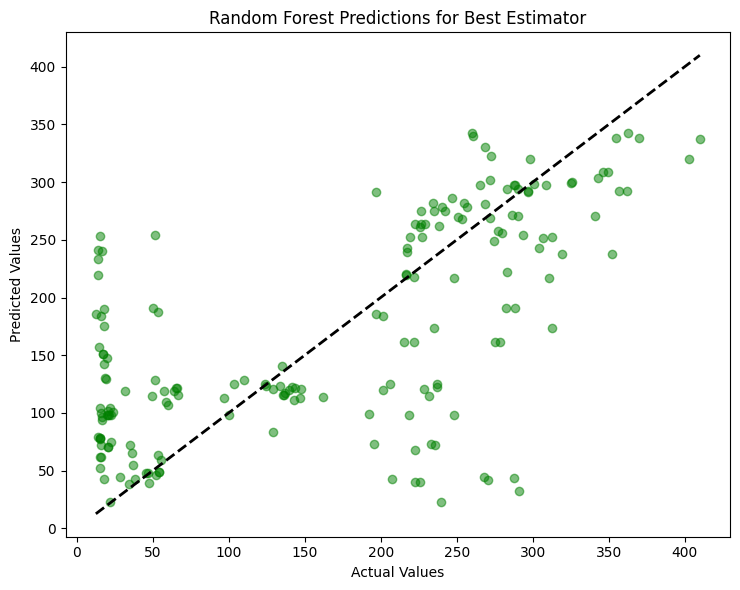

In [193]:
plt.figure(figsize=(7.5, 6))
# Scatter plot for Random Forest Predictions
plt.scatter(b_test, b_pred_best, color='green', alpha=0.5)
plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions for Best Estimator')

plt.tight_layout()
plt.show()

mse = mean_squared_error(n_test, n_pred_best)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")